# Bootcamp: Cientista de Dados - Desafio

- Data: junho de 2022.

## Autor

Feito com :heart: por [Alexsander Lopes Camargos](https://github.com/alexcamargos) :wave: Entre em contato!

[![GitHub](https://img.shields.io/badge/-AlexCamargos-1ca0f1?style=flat-square&labelColor=1ca0f1&logo=github&logoColor=white&link=https://github.com/alexcamargos)](https://github.com/alexcamargos)
[![Twitter Badge](https://img.shields.io/badge/-@alcamargos-1ca0f1?style=flat-square&labelColor=1ca0f1&logo=twitter&logoColor=white&link=https://twitter.com/alcamargos)](https://twitter.com/alcamargos)
[![Linkedin Badge](https://img.shields.io/badge/-alexcamargos-1ca0f1?style=flat-square&logo=Linkedin&logoColor=white&link=https://www.linkedin.com/in/alexcamargos/)](https://www.linkedin.com/in/alexcamargos/)
[![Gmail Badge](https://img.shields.io/badge/-alcamargos@vivaldi.net-1ca0f1?style=flat-square&labelColor=1ca0f1&logo=Gmail&logoColor=white&link=mailto:alcamargos@vivaldi.net)](mailto:alcamargos@vivaldi.net)

## Licença

[MIT License](https://choosealicense.com/licenses/mit/)

# Módulo 1 - Análise Estatística de Dados

## Objetivos

Exercitar os seguintes conceitos trabalhados no Módulo:

- Análise exploratória
- Teste de hipóteses
- Correlação
- Regressão.

## Enunciado

O desafio é constituído de um problema de negócio contendo quinze questões, que serão resolvidas utilizando o R. Será disponibilizado código R completo para execução de cada questão, a fim de que o aluno possa direcionar seus esforços no entendimento dos métodos estatísticos e interpretações. Mas àquele interessado em aprender o R, é uma excelente oportunidade e pode contar com apoio do professor.

## Atividades

Uma empresa que trabalha com vendas em um e-commerce deseja estudar quais características (variáveis) dos seus clientes que impactam no consumo, ou seja, as variáveis que têm relação ao quanto o cliente consome (compra). Para este objetivo, foram selecionados aleatoriamente 29 clientes do banco de dados.

Foram selecionadas sete variáveis para este estudo:

- _Consumo_ (variável contínua medida em reais) – É a variável resposta, nos diz qual foi o consumo de cada cliente.
- _Estado Civil_ (variável categórica com três níveis) – Nos informa se o cliente é Casado, Divorciado ou Solteiro.
- _Gênero_ (variável categórica com dois níveis) – Nos informa se o cliente faz parte do público masculino ou do público feminino.
- _Idade_ (variável discreta medida em anos) – Nos informa a idade do cliente.
- _Renda Mensal_ (variável contínua medida em reais) – Nos informa a renda mensal do cliente.
- _Possui Imóvel Próprio_ (variável categórica com dois níveis) – Nos informa se cliente possui imóvel próprio ou não.


In [1]:
# Versão da Linguagem Python
from platform import python_version as py_version

print(f'Versão da linguagem Python utilizada neste Jupyter Notebook: {py_version()}')

Versão da linguagem Python utilizada neste Jupyter Notebook: 3.10.4


In [2]:
# matplotlib - Biblioteca para plotagem de gráficos
import matplotlib.pyplot as plt

# numpy - Biblioteca para operações matemáticas
import numpy as np

# pandas - Biblioteca para manipulação de dados
import pandas as pd

# scipy - Biblioteca para cálculos matemáticos
import scipy.stats as st

# seaborn - Biblioteca para visualização de dados
import seaborn as sns

# pearson_test - Teste de Pearson para verificar a correlação entre duas variáveis
from scipy.stats import pearsonr as pearson_test

# shapiro_test - Teste de Shapiro-Wilk para verificar a normalidade dos dados
from scipy.stats import shapiro as shapiro_test

# statsmodels - Biblioteca para cálculos estatísticos
from statsmodels import api as sm

In [3]:
# Salvando os gráficos junto (inline) com o notebook.
%matplotlib inline

In [4]:
# Configurando a exibição dos gráficos para o notebook.
sns.set_theme(style='whitegrid', context='talk')

# Tamanho padrão dos gráficos.
sns.set(rc={'figure.figsize': (12, 6)})

In [5]:
# Carregando a base de dados de dados.
dados = pd.read_csv('dados.csv')

# Transformando a coluna id em índice.
dados.set_index('id', inplace=True)

dados

,Consumo,Estado_Civil,Genero,Idade,Renda_Mensal,Possui_Imovel_Proprio
id,,,,,,
1,2595,Divorciado,Feminino,20.258575,1985.881814,Sim
2,8470,Casado,Feminino,32.111844,3769.247918,Sim
3,4007,Divorciado,Masculino,31.746763,2291.880594,Nao
4,6734,Casado,Feminino,37.819850,2390.402807,Sim
5,33628,Solteiro,Feminino,71.208304,8534.717330,Nao
6,3903,Divorciado,Feminino,29.717636,2495.889756,Nao
7,13444,Solteiro,Feminino,44.809392,5714.554546,Nao
8,12560,Solteiro,Feminino,35.837612,5832.634327,Sim
9,31176,Solteiro,Feminino,58.838557,6882.898672,Sim


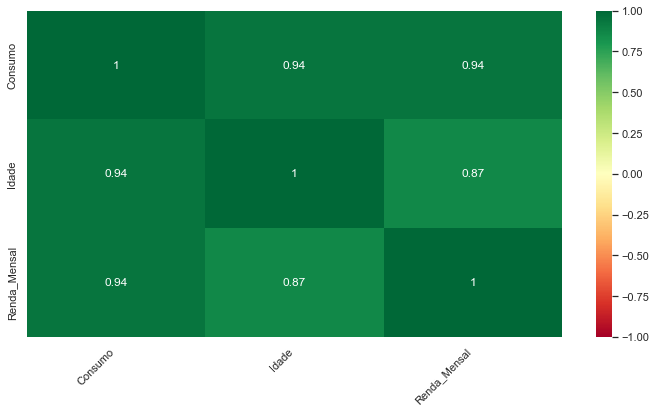

In [6]:
# Correlação entre as colunas que contem informações numéricas.
# https://www.tylervigen.com/spurious-correlations
heatmap = sns.heatmap(dados.corr(),
                      vmin=-1,
                      vmax=1,
                      annot=True,
                      cmap='RdYlGn',
                      center=0)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right');

In [7]:
dados

,Consumo,Estado_Civil,Genero,Idade,Renda_Mensal,Possui_Imovel_Proprio
id,,,,,,
1,2595,Divorciado,Feminino,20.258575,1985.881814,Sim
2,8470,Casado,Feminino,32.111844,3769.247918,Sim
3,4007,Divorciado,Masculino,31.746763,2291.880594,Nao
4,6734,Casado,Feminino,37.819850,2390.402807,Sim
5,33628,Solteiro,Feminino,71.208304,8534.717330,Nao
6,3903,Divorciado,Feminino,29.717636,2495.889756,Nao
7,13444,Solteiro,Feminino,44.809392,5714.554546,Nao
8,12560,Solteiro,Feminino,35.837612,5832.634327,Sim
9,31176,Solteiro,Feminino,58.838557,6882.898672,Sim


In [8]:
dados_transformados = dados.copy()

# Realizando transformação de variáveis categóricas para variáveis numéricas.
transformacao = {'Estado_Civil': {'Solteiro': 1,
                                  'Casado': 2,
                                  'Divorciado': 3},
                 'Possui_Imovel_Proprio': {'Sim': 1,
                                           'Nao': 2},
                 'Genero': {'Feminino': 1,
                            'Masculino': 2}}
dados_transformados.replace(transformacao, inplace=True)
dados_transformados.head()

,Consumo,Estado_Civil,Genero,Idade,Renda_Mensal,Possui_Imovel_Proprio
id,,,,,,
1,2595,3,1,20.258575,1985.881814,1
2,8470,2,1,32.111844,3769.247918,1
3,4007,3,2,31.746763,2291.880594,2
4,6734,2,1,37.819850,2390.402807,1
5,33628,1,1,71.208304,8534.717330,2


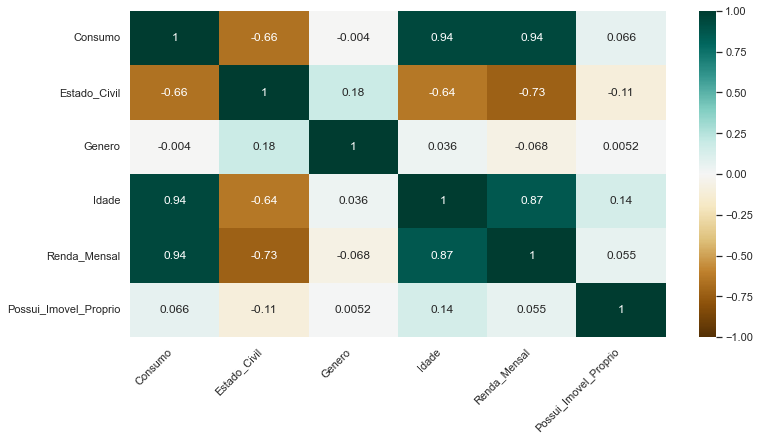

In [9]:
heatmap = sns.heatmap(dados_transformados.corr(),
                      vmin=-1,
                      vmax=1,
                      annot=True,
                      cmap='BrBG',
                      center=0)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right');

# Pergunta 1

_Explore a variável resposta, que é o Consumo, e responda:_

_Pelo histograma, você diria que a variável segue uma distribuição normal?_

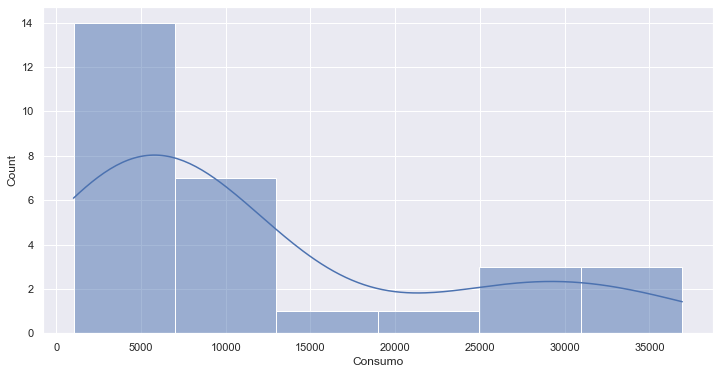

In [10]:
# Histograma da variável Consumo.
sns.histplot(dados['Consumo'], kde=True, bins=6);

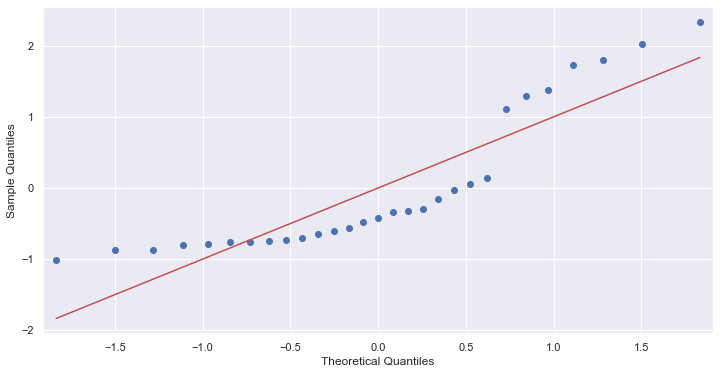

In [11]:
# Visualizando a distribuição da variável Preço utilizando Q-Q plot (quantile plot).
sm.qqplot(dados['Consumo'], line='r', fit=True);

In [12]:
# Teste de normalidade via Shapiro-Wilk.
statistic_w, p_value = shapiro_test(dados['Consumo'])
print(f'Teste de normalidade via Shapiro-Wilk - Estatística W: {statistic_w:.4f}')
print(f'Teste de normalidade via Shapiro-Wilk - P Valor: {p_value:.8f}')

Teste de normalidade via Shapiro-Wilk - Estatística W: 0.7977
Teste de normalidade via Shapiro-Wilk - P Valor: 0.00007610


In [13]:
# Interpretação do teste de normalidade via Shapiro-Wilk.
ic = .95    #95% de confiança
alfa = 1 - ic
print(f'Interpretação do teste de normalidade via Shapiro-Wilk - Alfa: {alfa:.2f}')

if p_value <= alfa:
    print('A variável Consumo segue uma distribuição normal.')
else:
    print('A variável Consumo não segue uma distribuição normal.')

Interpretação do teste de normalidade via Shapiro-Wilk - Alfa: 0.05
A variável Consumo segue uma distribuição normal.


# Pergunta 2

_Explore a variável resposta, que é o Consumo, e responda:_

_Pelo boxplot, você consegue visualizar algum outlier?_


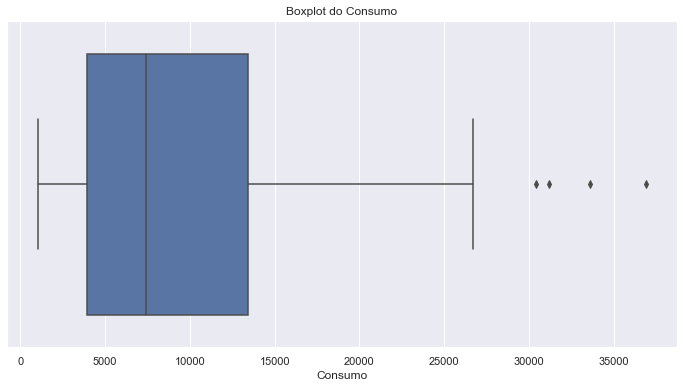

In [14]:
# Boxplot da variável Consumo.
consumo_box = sns.boxplot(x=dados['Consumo'])
consumo_box.set_title('Boxplot do Consumo');

In [15]:
# Mostrando quem são os outliers para a variável preço.
# Apenas os dados que apos 1.5 sigmas da média serão exibidos.
dados[np.abs(st.zscore(dados['Consumo'])) > 1.5].sort_values(by='Consumo')

,Consumo,Estado_Civil,Genero,Idade,Renda_Mensal,Possui_Imovel_Proprio
id,,,,,,
17,30420,Solteiro,Feminino,61.538719,5714.554546,Nao
9,31176,Solteiro,Feminino,58.838557,6882.898672,Sim
5,33628,Solteiro,Feminino,71.208304,8534.717330,Nao
15,36936,Solteiro,Masculino,71.208304,8534.717330,Nao


# Pergunta 3

_Explore a variável resposta, que é o Consumo, e responda:_

_Qual é o valor do primeiro quartil e terceiro quartil?_


In [16]:
# Mostrando o primeiro (25% dos dados) e terceiro quartil (75% dos dados) para a variável Consumo.
print(f'Primeiro Quartil: {dados["Consumo"].quantile(0.25):.0f}')
print(f'Terceiro Quartil: {dados["Consumo"].quantile(0.75):.0f}')

Primeiro Quartil: 3903
Terceiro Quartil: 13444


# Pergunta 4

_Suspeita-se que a variável Estado Civil está associada com o fato de o cliente Possuir Imóvel Próprio. Investigue a relação entre essas duas variáveis e responda:_

_Através do teste qui-quadrado, existe relação significativa entre o Estado Civil e o fato do cliente Possuir Imóvel Próprio? Justifique sua resposta. Adote 90% de confiança ao realizar suas interpretações._

IC = 90%


In [17]:
# Tabela de contingência mostrando a correlação entre Estado_Civil e Possui_Imovel_Proprio.
cont_table = pd.crosstab(dados['Estado_Civil'], dados['Possui_Imovel_Proprio'])
cont_table

Possui_Imovel_Proprio,Nao,Sim
Estado_Civil,,
Casado,6,2
Divorciado,4,3
Solteiro,10,4


In [18]:
# Correlação entre as variáveis Estado_Civil e Possui_Imovel_Proprio.
corr_estado_civil_imovel_proprio = dados_transformados['Estado_Civil'].corr(dados_transformados['Possui_Imovel_Proprio'])
print(f'Correlação entre as variáveis Estado_Civil e Possui_Imovel_Proprio: {corr_estado_civil_imovel_proprio:.4f}')

Correlação entre as variáveis Estado_Civil e Possui_Imovel_Proprio: -0.1071


In [19]:
# Teste de normalidade via Chi-Squared.
statistic_chi, p_value, dof, expected = st.chi2_contingency(cont_table)
print(f'Teste de normalidade via Chi-Squared - Estatística: {statistic_chi:.4f}')
print(f'Teste de normalidade via Chi-Squared - P Valor: {p_value:.8f}')

Teste de normalidade via Chi-Squared - Estatística: 0.6329
Teste de normalidade via Chi-Squared - P Valor: 0.72871815


In [20]:
# Interpretação do teste de normalidade via Chi-Squared.
ic = .9    #90% de confiança
alpha = 1 - ic
print(f'Interpretação do teste de normalidade via Chi-Squared - Alpha: {alpha:.2f}')

if p_value <= alpha:
    print('Não há evidência de que a correlação entre Estado_Civil e Possui_Imovel_Proprio é significante.')
else:
    print('Há evidência de que a correlação entre Estado_Civil e Possui_Imovel_Proprio é significante.')

Interpretação do teste de normalidade via Chi-Squared - Alpha: 0.10
Há evidência de que a correlação entre Estado_Civil e Possui_Imovel_Proprio é significante.


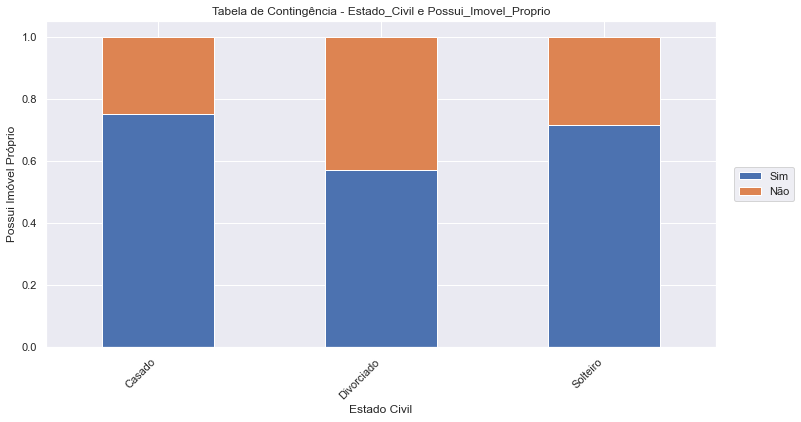

In [21]:
# Visualizando a tabela de contingência.
plot_fig = cont_table.div(cont_table.sum(1), axis=0).plot(kind='bar', stacked=True, legend=False)
plot_fig.set_xticklabels(plot_fig.get_xticklabels(), rotation=45, ha='right')
plot_fig.set_xlabel('Estado Civil')
plot_fig.set_ylabel('Possui Imóvel Próprio')
plot_fig.set_title('Tabela de Contingência - Estado_Civil e Possui_Imovel_Proprio')
plot_fig.legend(['Sim', 'Não'], loc='center right', bbox_to_anchor=(1.125, .5))
plt.show()

# Pergunta 5

_Explore a relação entre as variáveis Consumo e Possui Imóvel Próprio, e responda:_

_Através de um teste t de Student para amostras independentes, existe diferença significativa entre o consumo médio do público que possui imóvel próprio quando comparado com o consumo médio do público não possui imóvel próprio? Adote 95% de confiança ao realizar suas interpretações._


In [22]:
# Correlação entre as variáveis Estado_Civil e Possui_Imovel_Proprio.
corr_consumo_imovel_proprio = dados_transformados['Consumo'].corr(dados_transformados['Possui_Imovel_Proprio'])
print(f'Correlação entre as variáveis Consumo e Possui_Imovel_Proprio: {corr_consumo_imovel_proprio:.4f}')

Correlação entre as variáveis Consumo e Possui_Imovel_Proprio: 0.0660


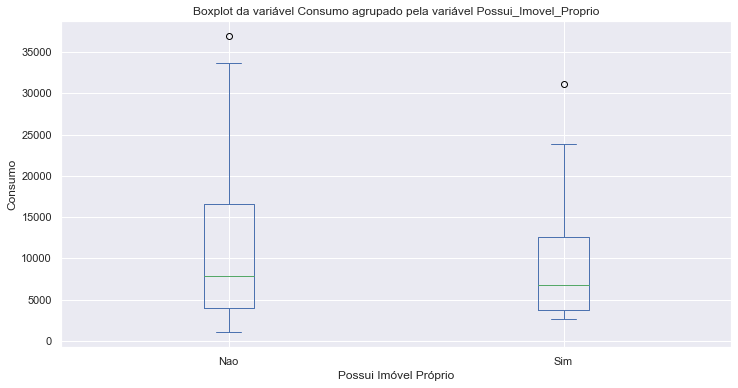

In [23]:
# Boxplot da variável Consumo agrupado pela variável Possui_Imovel_Proprio.
dados.plot.box(column='Consumo',
               by='Possui_Imovel_Proprio')
plt.title('Boxplot da variável Consumo agrupado pela variável Possui_Imovel_Proprio')
plt.xlabel('Possui Imóvel Próprio')
plt.ylabel('Consumo')
plt.show()

In [24]:
# Médias da variável Consumo agrupado pela variável Possui_Imovel_Proprio.
dados.groupby(['Possui_Imovel_Proprio'])['Consumo'].mean()

Possui_Imovel_Proprio
Nao    12391.300000
Sim    10862.777778
Name: Consumo, dtype: float64

In [25]:
# Teste de normalidade via t Student das variáveis Consumo e Possui_Imovel_Proprio.
statistic_t, p_value = st.ttest_ind(dados_transformados['Consumo'], dados_transformados['Possui_Imovel_Proprio'])
print(f'Teste de normalidade via Student - Estatística: {statistic_t:.4f}')
print(f'Teste de normalidade via Student - P Valor: {p_value:.8f}')

Teste de normalidade via Student - Estatística: 5.8814
Teste de normalidade via Student - P Valor: 0.00000024


In [26]:
# Interpretação do teste de normalidade via Student.
ic = .95    #95% de confiança
alpha = 1 - ic
print(f'Interpretação do teste de normalidade via Student - Alpha: {alpha:.2f}')

if p_value <= alpha:
    print('Não há evidência de que a correlação entre Consumo e Possui_Imovel_Proprio é significante.')
else:
    print('Há evidência de que a correlação entre Consumo e Possui_Imovel_Proprio é significante.')

Interpretação do teste de normalidade via Student - Alpha: 0.05
Não há evidência de que a correlação entre Consumo e Possui_Imovel_Proprio é significante.


# Pergunta 6

_Explore a relação entre as variáveis Consumo e Idade, e responda:_

_Pelo gráfico de dispersão, você identifica que existe relação linear entre o Consumo e a Idade? Se sim, a relação é positiva ou negativa?_


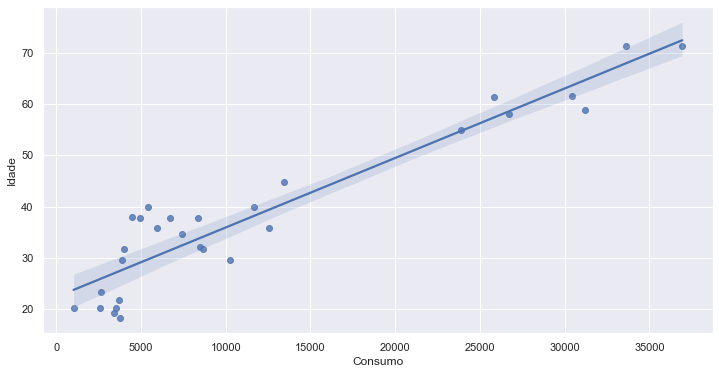

In [27]:
# Gráfico de dispersão da variável Consumo agrupado pela variável Idade.
sns.regplot(data=dados, x='Consumo', y='Idade');

In [28]:
# Correlação entre Consumo e Idade
print(f'Correlação entre Consumo e Idade: {dados["Consumo"].corr(dados["Idade"]):.4f}')

Correlação entre Consumo e Idade: 0.9399


# Pergunta 7

_Explore a relação entre as variáveis Consumo e Idade, e responda:_

_Obtenha o valor do coeficiente de correlação linear de Pearson entre o Consumo e a Idade e interprete._

 Marque a alternativa CORRETA.


In [29]:
# Coeficiente de correlação de Pearson entre as variáveis Consumo e Idade.
# dataframe.corr() é o mesmo que person_test()
corr_consumo_idade, p_value = pearson_test(dados['Consumo'], dados['Idade'])
print(f'Coeficiente de correlação de Pearson entre Consumo e Idade - Estatística: {corr_consumo_idade:.2f}')
print(f'Coeficiente de correlação de Pearson entre Consumo e Idade - P Valor: {p_value:.4e}')

Coeficiente de correlação de Pearson entre Consumo e Idade - Estatística: 0.94
Coeficiente de correlação de Pearson entre Consumo e Idade - P Valor: 4.0425e-14


In [30]:
# Interpretando o coeficiente de correlação de Pearson entre Consumo e Idade.
ic = .95    #95% de confiança
alpha = 1 - ic
print(f'Interpretação do coeficiente de correlação de Pearson entre Consumo e Idade - Alpha: {alpha:.2f}')

if p_value <= alpha:
    print('Há evidência de que a correlação entre Consumo e Idade é significante.')
else:
    print('Não há evidência de que a correlação entre Consumo e Idade é significante.')

Interpretação do coeficiente de correlação de Pearson entre Consumo e Idade - Alpha: 0.05
Há evidência de que a correlação entre Consumo e Idade é significante.


# Pergunta 8

_Explore a relação entre as variáveis Consumo e Idade, e responda:_

_Execute um teste de normalidade para regressão linear entre Consumo e Idade e, de acordo com os resultados, informe se os resíduos seguem ou não seguem uma distribuição normal. Adote 95% de confiança._


In [31]:
# Correlação entre as variáveis Consumo e Idade.
corr_consumo_idade = dados['Consumo'].corr(dados['Idade'])
print(f'Correlação entre as variáveis Consumo e Idade: {corr_consumo_idade:.4f}')

Correlação entre as variáveis Consumo e Idade: 0.9399


In [32]:
# Modelo de regressão linear entre as variáveis Consumo e Idade.

X = dados['Idade']      # Variável dependente (resposta).
Y = dados['Consumo']    # Variável preditora (explicativa).

slope, intercept, r_value, p_value, std_err = st.linregress(X, Y)

print(f'Slope: {slope:.4f}')
print(f'Intercept: {intercept:.4f}')
print(f'R-squared: {pow(r_value, 2) * 100:.2f}%')
print(f'P value: {p_value:.4e}')
print(f'Standard Error: {std_err:.4f}')

Slope: 652.8576
Intercept: -13248.7233
R-squared: 88.34%
P value: 4.0425e-14
Standard Error: 45.6422


# Pergunta 9
*Explore a relação entre as variáveis Consumo e Idade, e responda:*

_Execute um teste de normalidade para regressão linear entre Consumo e Idade e, de acordo com os resultados, informe se os resíduos seguem ou não seguem uma distribuição normal._

Adote 95% de confiança.

In [33]:
# Correlação entre as variáveis Consumo e Idade.
print(f'Correlação entre as variáveis Consumo e Idade: {dados["Consumo"].corr(dados["Idade"]):.4f}')

Correlação entre as variáveis Consumo e Idade: 0.9399


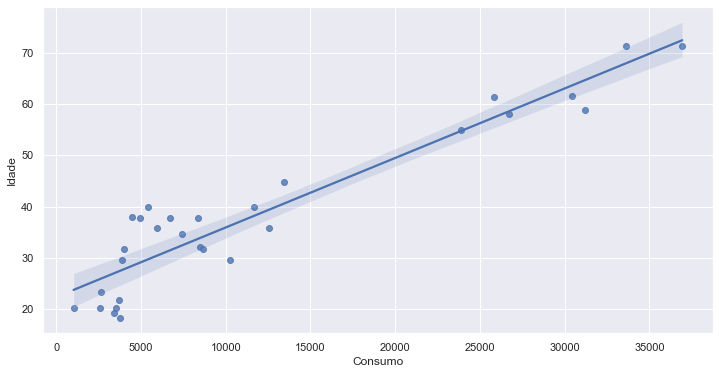

In [34]:
# Plotando o gráfico de dispersão da variável Consumo agrupado pela variável Idade.
sns.regplot(data=dados, x='Consumo', y='Idade');

In [35]:
# Modelo de regressão linear da variável Consumo em função da variável Idade.
# R: lm(Consumo ~ Idade, data=dados)
model = sm.OLS(dados['Consumo'], dados['Idade'])
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Consumo   R-squared (uncentered):                   0.853
Model:                            OLS   Adj. R-squared (uncentered):              0.848
Method:                 Least Squares   F-statistic:                              163.1
Date:                Sun, 05 Jun 2022   Prob (F-statistic):                    3.38e-13
Time:                        10:21:53   Log-Likelihood:                         -294.08
No. Observations:                  29   AIC:                                      590.2
Df Residuals:                      28   BIC:                                      591.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Idade        356.6392     27.927     12.771      0.000     299.434     413.844
==============================================================================
Omnibus:                        4.720   Durbin-Watson:                   2.229
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                4.216
Skew:                           0.920   Prob(JB):                        0.121
Kurtosis:                       2.681   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:ylabel='Count'>

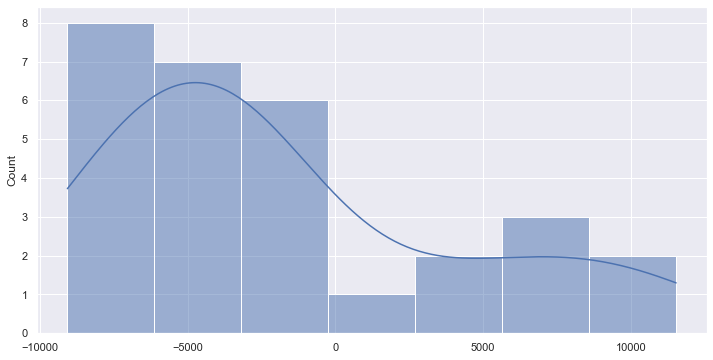

In [36]:
# Resíduos da regressão linear da variável Consumo em função da variável Idade.
residuos = model_fit.resid
sns.histplot(residuos, bins=7, kde=True)

In [37]:
# Estatística descritiva dos resíduos da regressão linear da variável Consumo em função da variável Idade.
residuos.describe()

count       29.000000
mean     -1830.412828
std       5960.084353
min      -9079.931907
25%      -6206.001641
50%      -3487.335588
75%       -221.096616
max      11540.328661
dtype: float64

In [38]:
# Teste de Shapiro-Wilk para os resíduos da regressão linear da variável Consumo em função da variável Idade.
statistic, pvalue = shapiro_test(residuos)
print(f'Teste de normalidade - Estatística: {statistic:.4f}')
print(f'Teste de normalidade - P Valor: {pvalue:.4f}')

Teste de normalidade - Estatística: 0.8786
Teste de normalidade - P Valor: 0.0031


In [39]:
# Interpretando o teste de normalidade para os resíduos da regressão linear da variável Consumo em função da variável Idade.
ic = .95    #95% de confiança
alpha = 1 - ic
print(f'Interpretação do teste de normalidade - Alpha: {alpha:.2f}')

if pvalue <= alpha:
    print('Há evidência de que os resíduos da regressão linear entre Consumo e Idade são normalmente distribuídos.')
else:
    print('Não há evidência de que os resíduos da regressão linear entre Consumo e Idade são normalmente distribuídos.')

Interpretação do teste de normalidade - Alpha: 0.05
Há evidência de que os resíduos da regressão linear entre Consumo e Idade são normalmente distribuídos.


# Pergunta 10

_Explore a variável Renda Mensal e responda:_

_Qual o valor do primeiro quartil e qual a sua interpretação CORRETA?_

In [40]:
# Primeiro quartil (25% dos dados) da variável Renda_Mensal.
dados['Renda_Mensal'].quantile(0.25)

2291.88059431382

# Pergunta 11

_Explore a variável Renda Mensal e responda:_

_Qual o valor da mediana e qual a sua interpretação CORRETA?_


In [41]:
# Mediana (50% dos dados) da variável Renda_Mensal.
dados['Renda_Mensal'].median()

3575.98064224822

# Pergunta 12

_Ajuste uma Regressão linear do Consumo em função da Idade e Renda Mensal, e responda:_

_O modelo de regressão linear ajustado é válido?_


In [42]:
# Transformando a escala da Renda_Mensal para centenas.
dados_renda = dados.copy()
dados_renda['Renda_Mensal'] = dados_renda['Renda_Mensal'] / 100

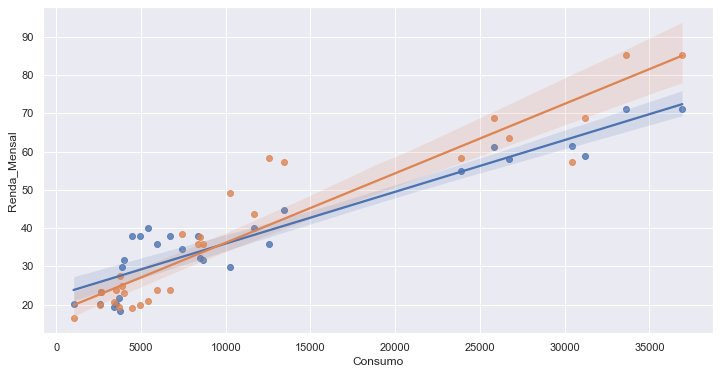

In [43]:
sns.regplot(data=dados_renda, x='Consumo', y='Idade')
sns.regplot(data=dados_renda, x='Consumo', y='Renda_Mensal');

In [44]:
# Modelo de regressão linear da variável Consumo em função das variáveis Idade e Renda_Mensal.
# R: lm(Consumo ~ Consumo + Renda_Mensal, data=dados)
model = sm.OLS(dados['Consumo'], dados[['Idade', 'Renda_Mensal']])
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Consumo   R-squared (uncentered):                   0.903
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                              125.5
Date:                Sun, 05 Jun 2022   Prob (F-statistic):                    2.14e-14
Time:                        10:21:54   Log-Likelihood:                         -288.13
No. Observations:                  29   AIC:                                      580.3
Df Residuals:                      27   BIC:                                      583.0
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Idade            2.4895     98.370      0.025      0.980    -199.348     204.327
Renda_Mensal     3.3830      0.913      3.704      0.001       1.509       5.257
==============================================================================
Omnibus:                        8.036   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                7.013
Skew:                           1.195   Prob(JB):                       0.0300
Kurtosis:                       3.301   Cond. No.                         458.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# Estatística descritiva dos resíduos da regressão linear da variável Consumo em função das variáveis Idade e Renda_Mensal.
residuos = model_fit.resid
residuos.describe()

count       29.000000
mean     -1591.573319
std       4819.743610
min      -7260.813589
25%      -4591.777064
50%      -3492.449664
75%      -1446.800583
max      10934.663429
dtype: float64

In [46]:
# Teste de Shapiro-Wilk para os resíduos da regressão linear da variável Consumo em função das variáveis Idade e Renda_Mensal.
statistic, pvalue = shapiro_test(residuos)
print(f'Teste de normalidade - Estatística: {statistic:.4f}')
print(f'Teste de normalidade - P Valor: {pvalue:.4f}')

Teste de normalidade - Estatística: 0.8366
Teste de normalidade - P Valor: 0.0004


# Pergunta 13

_Ajuste uma Regressão linear do Consumo em função da Idade e Renda Mensal, e responda:_

_Marque a alternativa com a interpretação CORRETA do coeficiente Beta da variável Idade._


In [47]:
# Modelo de regressão linear da variável Consumo em função das variáveis Idade e Renda_Mensal.
# R: lm(Consumo ~ Consumo + Renda_Mensal, data=dados)
model = sm.OLS(dados['Consumo'], dados[['Idade', 'Renda_Mensal']])
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Consumo   R-squared (uncentered):                   0.903
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                              125.5
Date:                Sun, 05 Jun 2022   Prob (F-statistic):                    2.14e-14
Time:                        10:21:54   Log-Likelihood:                         -288.13
No. Observations:                  29   AIC:                                      580.3
Df Residuals:                      27   BIC:                                      583.0
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Idade            2.4895     98.370      0.025      0.980    -199.348     204.327
Renda_Mensal     3.3830      0.913      3.704      0.001       1.509       5.257
==============================================================================
Omnibus:                        8.036   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                7.013
Skew:                           1.195   Prob(JB):                       0.0300
Kurtosis:                       3.301   Cond. No.                         458.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# Coeficiente Beta da variável Idade.
print(f'Coeficiente Beta da variável Idade: {model_fit.params["Idade"]:.4f}')

Coeficiente Beta da variável Idade: 2.4895


# Pergunta 14

_Ajuste uma Regressão linear do Consumo em função da Idade e Renda Mensal, e responda:_

_Marque a alternativa com a interpretação CORRETA do coeficiente Beta da variável Renda Mensal._


In [49]:
# Modelo de regressão linear da variável Consumo em função das variáveis Idade e Renda_Mensal.
# R: lm(Consumo ~ Consumo + Renda_Mensal, data=dados)
model = sm.OLS(dados['Consumo'], dados[['Idade', 'Renda_Mensal']])
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Consumo   R-squared (uncentered):                   0.903
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                              125.5
Date:                Sun, 05 Jun 2022   Prob (F-statistic):                    2.14e-14
Time:                        10:21:55   Log-Likelihood:                         -288.13
No. Observations:                  29   AIC:                                      580.3
Df Residuals:                      27   BIC:                                      583.0
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Idade            2.4895     98.370      0.025      0.980    -199.348     204.327
Renda_Mensal     3.3830      0.913      3.704      0.001       1.509       5.257
==============================================================================
Omnibus:                        8.036   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                7.013
Skew:                           1.195   Prob(JB):                       0.0300
Kurtosis:                       3.301   Cond. No.                         458.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# Coeficiente Beta da variável Renda_Mensal.
print(f'Coeficiente Beta da variável Renda_Mensal: {model_fit.params["Renda_Mensal"]:.4f}')

Coeficiente Beta da variável Renda_Mensal: 3.3830


# Pergunta 15

_Ajuste uma Regressão linear do Consumo em função da Idade e Renda Mensal, e responda:_

_Como os valores t são obtidos?_

`coluna t value`


In [51]:
# Modelo de regressão linear da variável Consumo em função das variáveis Idade e Renda_Mensal.
# R: lm(Consumo ~ Consumo + Renda_Mensal, data=dados)
model = sm.OLS(dados['Consumo'], dados[['Idade', 'Renda_Mensal']])
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Consumo   R-squared (uncentered):                   0.903
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                              125.5
Date:                Sun, 05 Jun 2022   Prob (F-statistic):                    2.14e-14
Time:                        10:21:55   Log-Likelihood:                         -288.13
No. Observations:                  29   AIC:                                      580.3
Df Residuals:                      27   BIC:                                      583.0
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Idade            2.4895     98.370      0.025      0.980    -199.348     204.327
Renda_Mensal     3.3830      0.913      3.704      0.001       1.509       5.257
==============================================================================
Omnibus:                        8.036   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                7.013
Skew:                           1.195   Prob(JB):                       0.0300
Kurtosis:                       3.301   Cond. No.                         458.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# Valores t dos coeficientes.
model_fit.summary2().tables[1]['t']

Idade           0.025308
Renda_Mensal    3.704300
Name: t, dtype: float64

In [53]:
dados.columns

Index(['Consumo', 'Estado_Civil', 'Genero', 'Idade', 'Renda_Mensal',
       'Possui_Imovel_Proprio'],
      dtype='object')

# Bonus
## regressão

# Bonus

Modelo de regessão envolvendo todas as variáveis explicativas.
- Estado_Civil
- Genero
- Idade
- Renda_Mensal
- Possui_Imovel_Proprio'

In [54]:
# Modelo de regressão linear da variável Consumo em função das variáveis explicativas.
# R: lm(Consumo ~ Consumo + Estado_Civil + Genero + Idade + Renda_Mensal + Possui_Imovel_Proprio, data=dados)
model = sm.OLS(dados_transformados['Consumo'], dados_transformados[['Estado_Civil', 'Genero', 'Idade', 'Renda_Mensal', 'Possui_Imovel_Proprio']])
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Consumo   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              133.2
Date:                Sun, 05 Jun 2022   Prob (F-statistic):                    1.08e-16
Time:                        10:21:55   Log-Likelihood:                         -273.23
No. Observations:                  29   AIC:                                      556.5
Df Residuals:                      24   BIC:                                      563.3
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Estado_Civil          -1611.1728    798.237     -2.018      0.055   -3258.652      36.307
Genero                 -847.9774   1238.529     -0.685      0.500   -3404.175    1708.220
Idade                   335.8203     81.796      4.106      0.000     167.002     504.638
Renda_Mensal              2.0311      0.627      3.238      0.003       0.737       3.326
Possui_Imovel_Proprio -2824.1789   1147.946     -2.460      0.021   -5193.424    -454.934
==============================================================================
Omnibus:                        0.410   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.815   Jarque-Bera (JB):                0.558
Skew:                           0.195   Prob(JB):                        0.756
Kurtosis:                       2.443   Cond. No.                     9.79e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
# Tabela explicativa do resultado da regressão linear da variável Consumo em função das variáveis explicativas.
model_fit.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Estado_Civil,-1611.172825,798.236721,-2.018415,0.054857,-3258.652446,36.306795
Genero,-847.977362,1238.528654,-0.684665,0.500114,-3404.174868,1708.220145
Idade,335.820329,81.795767,4.105595,0.000403,167.002163,504.638495
Renda_Mensal,2.031133,0.627193,3.238449,0.003499,0.736670,3.325595
Possui_Imovel_Proprio,-2824.178905,1147.946316,-2.460201,0.021469,-5193.423655,-454.934155


In [56]:
# Residuos da regressão linear da variável Consumo em função das variáveis explicativas.
residuos = model_fit.resid

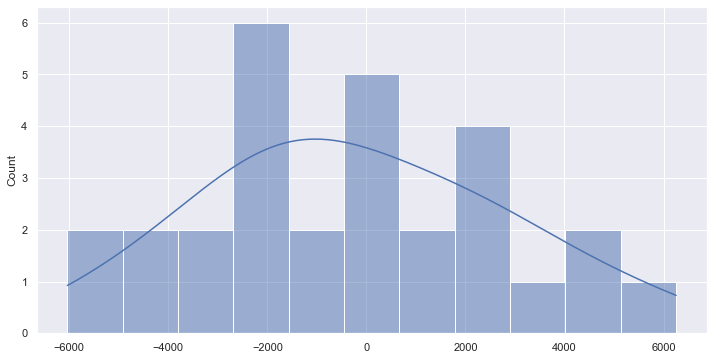

In [57]:
# Gráfico de dispersão dos resíduos da regressão linear da variável Consumo em função das variáveis explicativas.
sns.histplot(data=residuos, bins=11, kde=True);

In [58]:
# Teste de normalidade dos resíduos da regressão linear da variável Consumo em função das variáveis explicativas.
statistic, pvalue = shapiro_test(residuos)
print(f'Teste de normalidade - Estatística: {statistic:.4f}')
print(f'Teste de normalidade - P Valor: {pvalue:.4f}')

Teste de normalidade - Estatística: 0.9845
Teste de normalidade - P Valor: 0.9344
